In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [2]:
# import data as dataframe
wind_citypop_df = pd.read_csv("Resources/wind_citypop.csv") 
wind_citypop_df = wind_citypop_df.drop(['Unnamed: 0'],axis=1) 
wind_citypop_df.head()

,ID,Element,State,Value,Latitude,Longitude,Elevation,City/Town/County,Density
0,USC00050109,AWND,CO,47.200534,40.1550,-103.1417,1384.4,Akron,255.0
1,USC00052947,AWND,CO,40.141416,40.6483,-102.8594,1297.2,Fleming,296.0
2,USC00053261,AWND,CO,44.030606,39.7053,-105.6997,2596.9,Georgetown,422.0
3,USC00116344,AWND,IL,36.978536,40.1100,-87.9567,205.7,Ogden,544.0
4,USC00185934,AWND,MD,42.654162,39.7194,-76.8028,262.1,Carrol County,374.0


In [3]:
wind_citypop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 9 columns):
ID                  449 non-null object
Element             449 non-null object
State               449 non-null object
Value               449 non-null float64
Latitude            449 non-null float64
Longitude           449 non-null float64
Elevation           449 non-null float64
City/Town/County    448 non-null object
Density             449 non-null float64
dtypes: float64(5), object(4)
memory usage: 31.6+ KB


In [4]:
# We investigate the datas which population Density no more than 500 per square mile
wind_citypop_df= wind_citypop_df[wind_citypop_df['Density']<=500.0]
wind_state_df = wind_citypop_df.groupby('State')['City/Town/County'].count()
wind_state_df = wind_state_df.reset_index() 
wind_state_df = wind_state_df.sort_values(by="City/Town/County", ascending=False )
wind_state_df = wind_state_df.rename(columns={"City/Town/County": "Suitable Sites"})
wind_state_df.head()

,State,Suitable Sites
0,AK,22
32,TX,14
24,NM,9
4,CO,8
14,MI,7


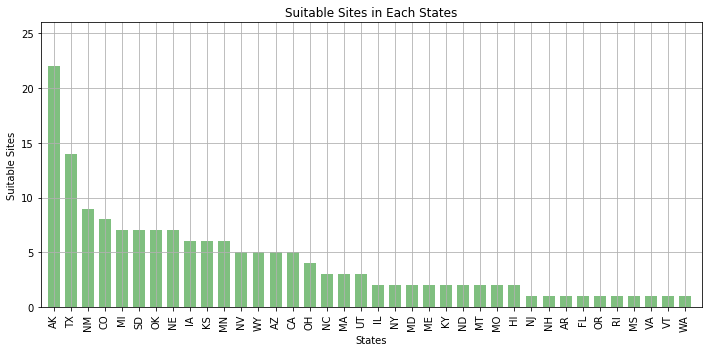

In [55]:
# create x_axis and ticks locations
x_axis=np.arange(len(wind_state_df))
tick_locations = [i for i in x_axis ]
# Create a bar chart based on wind_state_df
plt.figure(figsize=(10,5))
plt.bar(x_axis,wind_state_df['Suitable Sites'],color='g', alpha=0.5, align="center",width=0.7)
plt.xticks(tick_locations, wind_state_df["State"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(wind_state_df['Suitable Sites'])+4)

# Set title , xlabel, ylabel
plt.xlabel('States')
plt.ylabel('Suitable Sites')
plt.title("Suitable Sites in Each States")

# Set the grid
plt.grid()

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("Image/Suitable Sites in Each States.png")
plt.show()


In [112]:
#import other csv file as dataframe
# Coal Emissions by State (1980 - 2016) 
# From U.S Energy Information Administration
coal_CO2_df= pd.read_excel('Resources/coal_CO2_by_state_2016.xlsx')
coal_CO2_df.head()

,Coal Emissions by State (1980 - 2016),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,million metric tons of carbon dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Change from 1980 - 2016,NaN
1,State,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,Percent,Absolute
2,Alabama,61.6,58.8,47.8,49.9,54.7,62.1,61.9,61.9,61.2,...,59.5,67.8,61.4,51.6,53.3,54.3,46.6,38.6,-0.373377,-23
3,Alaska,0.4,1.2,1.2,1.2,1.2,1.1,1.1,0.4,0.4,...,1.4,1.4,1.5,1.5,1.4,1.7,1.8,1.6,3,1.2
4,Arizona,23.0,30.0,31.6,27.7,30.5,32.1,27.8,26.6,29.1,...,39.0,43.2,43.4,39.7,43.0,42.3,36.4,30.6,0.330435,7.6


In [113]:
# Rename coal_CO2_df columns
for i in range(len(coal_CO2_df.columns)):
    coal_CO2_df = coal_CO2_df.rename(columns={coal_CO2_df.columns[i]:coal_CO2_df.iloc[1,i]})
# Delete the first two rows
coal_CO2_df = coal_CO2_df[2:]
coal_CO2_df.head()

,State,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,Percent,Absolute
2,Alabama,61.6,58.8,47.8,49.9,54.7,62.1,61.9,61.9,61.2,...,59.5,67.8,61.4,51.6,53.3,54.3,46.6,38.6,-0.373377,-23
3,Alaska,0.4,1.2,1.2,1.2,1.2,1.1,1.1,0.4,0.4,...,1.4,1.4,1.5,1.5,1.4,1.7,1.8,1.6,3,1.2
4,Arizona,23.0,30.0,31.6,27.7,30.5,32.1,27.8,26.6,29.1,...,39.0,43.2,43.4,39.7,43.0,42.3,36.4,30.6,0.330435,7.6
5,Arkansas,3.4,9.6,11.8,16.7,15.4,20.7,21.1,19.8,20.6,...,24.9,27.7,28.9,28.0,30.9,32.0,21.4,23.3,5.85294,19.9
6,California,6.1,7.2,6.4,3.0,3.5,4.2,4.0,4.2,4.8,...,4.9,5.2,5.2,4.1,3.6,3.7,2.9,3.0,-0.508197,-3.1


In [114]:
# Retrieve State and 2016 two columns from dataset
coal_CO2_df = coal_CO2_df[['State',2016.0]]
# Rename columns
coal_CO2_df = coal_CO2_df.rename(columns={2016.0:"CO2 production 2016"})
# Delete the row in which state is United States 
coal_CO2_df = coal_CO2_df[coal_CO2_df['State'] !='United States']
coal_CO2_df['CO2 production 2016']=coal_CO2_df['CO2 production 2016']*1000000
coal_CO2_df.head()

,State,CO2 production 2016
2,Alabama,38600000.0
3,Alaska,1600000.0
4,Arizona,30600000.0
5,Arkansas,23300000.0
6,California,3000000.0


In [115]:
# #import uscitiesv1.4.csv csv file as dataframe
uscities_df = pd.read_csv("Resources/uscitiesv1.4.csv")
uscities_df.head()


,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id
0,Whitestone Logging Camp,Whitestone Logging Camp,AK,Alaska,2105,Hoonah-Angoon,58.0653,-135.4200,NaN,NaN,0.0,polygon,False,America/Juneau,99829 99825,1840023688
1,Portage Creek,Portage Creek,AK,Alaska,2070,Dillingham,58.9049,-157.6690,NaN,NaN,0.0,polygon,False,America/Anchorage,99576,1840023660
2,Talkeetna,Talkeetna,AK,Alaska,2170,Matanuska-Susitna,62.2753,-150.0814,NaN,NaN,195.2,polygon,False,America/Anchorage,99676,1840023375
3,King Salmon,King Salmon,AK,Alaska,2060,Bristol Bay,58.7540,-156.5066,NaN,NaN,0.0,polygon,False,America/Anchorage,99613,1840023272
4,Edna Bay,Edna Bay,AK,Alaska,2198,Prince of Wales-Hyder,55.9645,-133.6665,43.0,43.0,0.0,polygon,True,America/Sitka,99921,1840000514


In [116]:
# We only retrieve columns city_ascii,state_id 
uscities_df = uscities_df[['state_name','state_id']]
uscities_df = uscities_df.rename(columns={'state_name':"State"})
# combine two dataset to get the state abbreviation.
coal_CO2_df = coal_CO2_df.merge(uscities_df,on="State",how="left")
# Delete the duplicated rows
coal_CO2_df= coal_CO2_df.drop_duplicates()
coal_CO2_df.head()

,State,CO2 production 2016,state_id
0,Alabama,38600000.0,AL
762,Alaska,1600000.0,AK
1117,Arizona,30600000.0,AZ
1565,Arkansas,23300000.0,AR
2412,California,3000000.0,CA


In [117]:
# Organize the columns of coal_CO2_df
coal_CO2_df = coal_CO2_df[['CO2 production 2016','state_id']]
coal_CO2_df = coal_CO2_df.rename(columns={'state_id':'State'})
# Sort CO2 production 2016 value
coal_CO2_df = coal_CO2_df.sort_values(by='CO2 production 2016',ascending = False)
coal_CO2_df.head(10)

,CO2 production 2016,State
30085,124900000.0,TX
8943,89100000.0,IN
23752,77600000.0,OH
34448,70900000.0,WV
11809,69600000.0,KY
26496,68900000.0,PA
7407,66200000.0,IL
17260,60400000.0,MO
14634,44400000.0,MI
35935,43200000.0,WY


In [118]:
# Plot carbon dioxide production by coal for each state
data = dict(type = 'choropleth',
            colorscale = 'Bluered',
            locations = coal_CO2_df['State'],
            locationmode = 'USA-states',
            z = coal_CO2_df['CO2 production 2016'],
            text = coal_CO2_df['State'],
            marker = dict(line = dict(color = 'rgb(255,255,255)', width = 2)),
            colorbar = {'title': 'Tons of C02'})
layout = dict(title = 'Carbon Dioxide Production by Coal in 2016(Ton)',
             geo = dict(scope = 'usa',showlakes = True, lakecolor = 'rgb(85, 173, 240)'))
choromap = go.Figure(data = [data], layout=layout)
iplot(choromap)


In [123]:
# Combine two dataframes 
coal_CO2_df = coal_CO2_df.merge(wind_state_df,on='State',how='left')
# Replace nan value with 0
coal_CO2_df = coal_CO2_df.fillna(0)
# change the value type
coal_CO2_df['Suitable Sites']= coal_CO2_df['Suitable Sites'].astype(int)
#Sort the column for CO2 Production 2014
coal_CO2_df= coal_CO2_df.sort_values(by='CO2 production 2016',ascending=False)
coal_CO2_df = coal_CO2_df.reset_index()[['State','CO2 production 2016','Suitable Sites']]
coal_CO2_df.head(10)

,State,CO2 production 2016,Suitable Sites
0,TX,124900000.0,14
1,IN,89100000.0,0
2,OH,77600000.0,4
3,WV,70900000.0,0
4,KY,69600000.0,2
5,PA,68900000.0,0
6,IL,66200000.0,2
7,MO,60400000.0,2
8,MI,44400000.0,7
9,WY,43200000.0,5


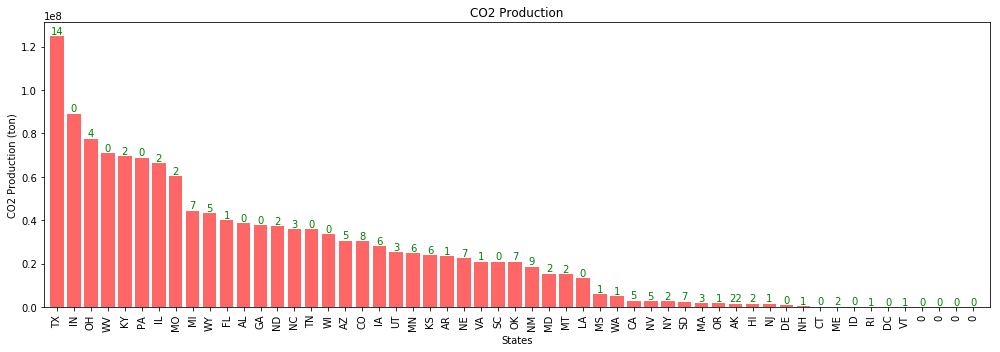

In [124]:
# Plot the CO2 Production 
# create x_axis and ticks locations
x_axis=np.arange(len(coal_CO2_df))
tick_locations = [i for i in x_axis ]

# Create a bar chart based on wind_state_df_2
plt.figure(figsize=(14,5))
plt.bar(x_axis,coal_CO2_df['CO2 production 2016'],color='red', alpha=0.6, align="center")
plt.xticks(tick_locations, coal_CO2_df["State"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))


# Set title , xlabel
plt.xlabel('States')
plt.ylabel("CO2 Production (ton)")
plt.title("CO2 Production")

# Create Text 
# Set The position to place the text and the text we need to add
text_xloc=[x for x in x_axis]
text_yloc=[x for x in coal_CO2_df['CO2 production 2016']]
text=[x for x in coal_CO2_df['Suitable Sites']]
for i in range(len(coal_CO2_df)):
    plt.text(text_xloc[i],text_yloc[i],text[i],ha="center", va="bottom", color = "green")



# Save our graph and show the grap
plt.tight_layout()
plt.savefig("Image/CO2 Production.png")

